In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap
from collections import Counter
from skmultilearn.dataset import load_dataset
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# We import seaborn to make nice plots. 
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


def line(marker='-', n = 30):
    print(marker*n)
    print()

## Part A — Preprocessing and initial setup

This section loads the ARFF file, inspects dimensions, and constructs the coloring scheme requested (two most frequent single labels, one common multi-label, and "Other").

In [ ]:
X, Y, feature_names, label_names = load_dataset('yeast', 'undivided')

# Convert from sparse matrix format to a dense numpy array for easier manipulation
X = X.toarray()
Y = Y.toarray()

label_names = [l[0] for l in label_names]
feature_names = [f[0] for f in feature_names]

# Report the initial shapes of the feature and label matrices
print('Feature names: ', feature_names)
print('Lable names: ', label_names)
line()
print(f"Feature matrix (X) shape: {X.shape}")
print(f"Label matrix (Y) shape: {Y.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {Y.shape[1]}")

yeast:undivided - exists, not redownloading
Feature names:  ['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103']
Lable names:  ['C

In [ ]:
df = pd.DataFrame(X, columns= feature_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Columns: 103 entries, Att1 to Att103
dtypes: float64(103)
memory usage: 1.9 MB


In [94]:
print("Data Preview:")
print("Features (first 5 rows and 5 features):")
display(df.iloc[:5, :5])

print("\nLabels (first 5 rows):")
# print(type(Y))
display(pd.DataFrame(Y, columns=label_names).head())

Data Preview:
Features (first 5 rows and 5 features):


,Att1,Att2,Att3,Att4,Att5
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970
2,0.509949,0.401709,0.293799,0.087714,0.011686
3,0.119092,0.004412,-0.002262,0.072254,0.044512
4,0.042037,0.007054,-0.069483,0.081015,-0.048207



Labels (first 5 rows):


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [65]:
print("Data Quality check: ")
print("Number of Missing values: ", df.isna().sum(axis=0).sum())
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Data Quality check: 
Number of Missing values:  0
Number of duplicate rows: 0


In [ ]:
n_samples = Y.shape[0]
label_counts = Y.sum(axis=1)

print("Per Class frequencies over different datapoints: ")
perclass_freq = Y.sum(axis=0)
print(perclass_freq)
print()
print("Multilabelled frequencies: ")
d = dict(Counter(label_counts))
print(d)
line()

single_label_idxs = np.where(label_counts==1)[0]

Y_single = Y[single_label_idxs]
print("Single labelled data distribution among 14 classes: ", Y_single.sum(axis=0))
line()

single_labels = []
for i in single_label_idxs:
    lab = np.where(Y[i]==1)[0]
    if len(lab)==1:
        single_labels.append(lab[0])

single_counter = Counter(single_labels)

most_common_two = [lab for lab, _ in single_counter.most_common(2)]

if len(most_common_two) > 1:
    lst = [label_names[i] for i in most_common_two]
    print("Two most frequent single-label classes (indices):", most_common_two)
else: 
    lst = [label_names[i] for i in most_common_two]
    print('Only one most frequent single-label class exists: ', lst)


combos = [tuple(row) for row in Y.tolist()]
combo_counter = Counter(combos)
most_common = combo_counter.most_common(3)

top_combos = []
for i in range(4):
    combo, count = most_common[i] if i < len(most_common) else ((0,)*Y.shape[1], 0)
    top_combos.append((np.array(combo), count))

print('Most frequent multi-label combination (as binary tuple):', most_common[0])
line()

cat = np.full(n_samples, 5, dtype=int)
if most_common_two:
    cat[np.where((label_counts==1) & (np.argmax(Y, axis=1)==most_common_two[0]))] = 0
if len(most_common_two) > 1:
    cat[np.where((label_counts==1) & (np.argmax(Y, axis=1)==most_common_two[1]))] = 1

for idx, (combo, _) in enumerate(top_combos):
    combo_mask = np.all(Y == combo, axis=1)
    cat[combo_mask] = idx + 2   

cat_names = {0: f'Single-{most_common_two[0]+1}' if most_common_two else 'Single-1',
             1: f'Single-{most_common_two[1]+1}' if len(most_common_two)>1 else 'Single-2',
             2: 'mostfrequent-multicomb',
             3: 'multi-comb2' ,
             4: 'multi-comb3' ,
             5: 'Other'}

print("Distribution of new categories for visualization: ")

d = Counter(cat)
for k, v in dict(d).items():
    print(cat_names[k], "\t", v)
line()
print('Category names mapping:', cat_names)

Per Class frequencies over different datapoints: 
[ 762 1038  983  862  722  597  428  480  178  253  289 1816 1799   34]

Multilabelled frequencies: 
{4: 1102, 2: 412, 3: 112, 5: 173, 7: 102, 6: 415, 8: 55, 1: 32, 9: 9, 10: 4, 11: 1}
------------------------------

Single labelled data distribution among 14 classes:  [32  0  0  0  0  0  0  0  0  0  0  0  0  0]
------------------------------

Only one most frequent single-label class exists:  ['Class1']
Most frequent multi-label combination (as binary tuple): ((0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), 237)
------------------------------

Distribution of new categories for visualization: 
Counter({5: 1743, 2: 237, 3: 233, 4: 172, 0: 32})
Other 	 1743
multi-comb3 	 172
mostfrequent-multicomb 	 237
multi-comb2 	 233
Single-1 	 32
------------------------------

Category names mapping: {0: 'Single-1', 1: 'Single-2', 2: 'mostfrequent-multicomb', 3: 'multi-comb2', 4: 'multi-comb3', 5: 'Other'}


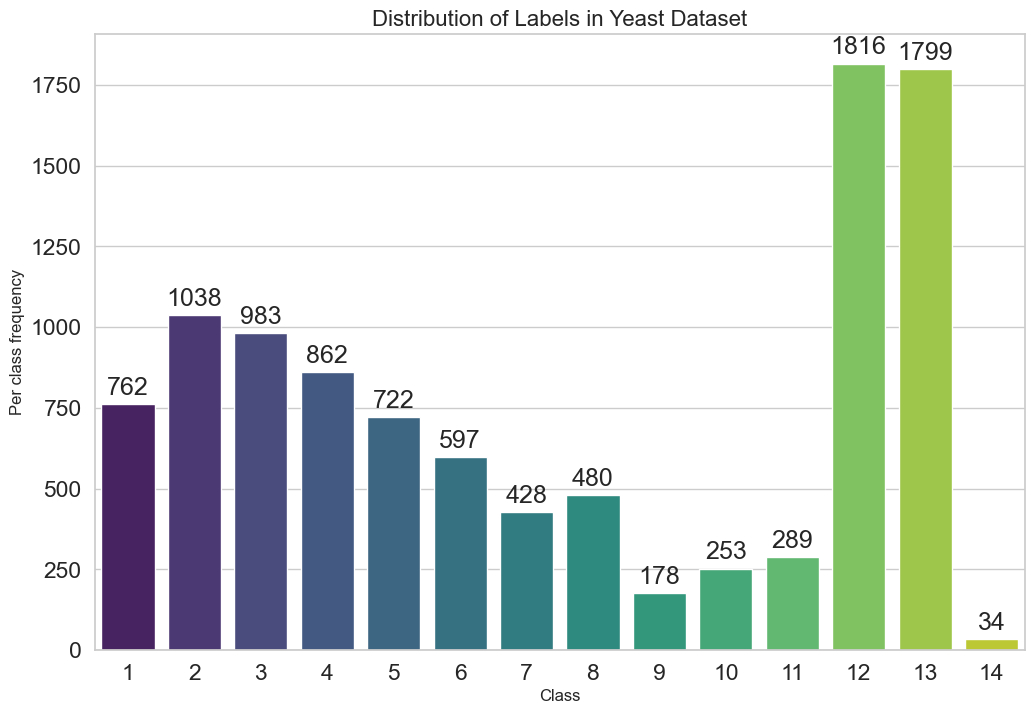

In [123]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=range(1, 15),
    y=perclass_freq, 
    palette="viridis"
)

ax.set_title("Distribution of Labels in Yeast Dataset", fontsize=16)
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Per class frequency", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()

### Scaling 

`TSNE` and `Isomap` are dimensionality-reduction methods which depends on **pairwise distances or neighborhood relationships** between samples in the original feature space:

| Algorithm | Core Idea | Depends On |
|------------|------------|------------|
| **t-SNE** | Preserves local similarities (based on pairwise distances converted to probabilities) | Euclidean distance |
| **Isomap** | Computes geodesic distances along a nearest-neighbor graph, then applies MDS | Pairwise distances |

Since all rely on distances, their behavior is highly sensitive to the **scale** of features.

#### Why Scaling Is Necessary
Different features may have very different numerical ranges:

| Feature | Example Range |
|----------|----------------|
| Enzyme activity | 0.1 – 0.9 |
| Gene length | 100 – 5000 |
| Protein count | 10 – 200 |

If we compute the Euclidean distance without scaling:

$$ \|x_i - x_j\|^2 = \sum_k (x_{ik} - x_{jk})^2 $$

The largest-range features dominate the distance calculation.  
This distorts the **geometry** of the data — features with large numeric ranges overshadow smaller-range features.

#### How Scaling Fixes This
By scaling, we ensure all features contribute comparably to the distance:

- **StandardScaler (z-score):**
  $$ x'_{ik} = \frac{x_{ik} - \mu_k}{\sigma_k} $$

  Each feature has mean 0, variance 1. This ensures that all features contribute equally to the distance metrics, leading to a more meaningful and reliable low-dimensional embedding. Without scaling, the resulting visualization would be biased and potentially misleading.

This way, Euclidean distances reflect *relative* rather than *absolute* magnitude differences.


In [132]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Scaled X mean (per-feature) first ten:', np.round(X_scaled.mean(axis=0)[:10],3))
print('Scaled X std (per-feature) first ten:', np.round(X_scaled.std(axis=0)[:10],3))

Scaled X mean (per-feature) first ten: [ 0.  0. -0. -0.  0. -0.  0.  0.  0.  0.]
Scaled X std (per-feature) first ten: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Part B: t-SNE and Veracity Inspection

Now that our data is prepared, we will use **t-Distributed Stochastic Neighbor Embedding (t-SNE)** to reduce the 103-dimensional feature space into a 2-dimensional map that we can visualize. t-SNE is a powerful technique particularly well-suited for revealing the underlying **local structure** of data, showing how data points group together in their high-dimensional neighborhoods.

### t-SNE Implementation and the `perplexity` Hyperparameter

A crucial hyperparameter for t-SNE is `perplexity`. In simple terms, perplexity can be thought of as a guess about the number of close neighbors each point has. It influences how the algorithm balances local and global aspects of the data structure.

* A **low perplexity** value (e.g., 5) makes the algorithm focus on the smallest local details, which can sometimes result in tight, separated clusters that might overstate the true separation.
* A **high perplexity** value (e.g., 50) considers a larger number of neighbors for each point, which can help reveal more of the data's global structure but might obscure fine-grained clusters.

As instructed, we will experiment with several perplexity values in range [`5`, `50`] to observe how the visualization changes and to select the most informative one for our final analysis.

In [149]:
def run_tsne(X, perplexity=30, random_state=63):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state, init='pca', learning_rate='auto')
    Z = tsne.fit_transform(X)
    return Z


perps = [5, 15, 25, 30, 40, 50]
tsne_results = {}
for p in perps:
    print('Running t-SNE with perplexity =', p)
    tsne_results[p] = run_tsne(X_scaled, perplexity=p)


Running t-SNE with perplexity = 5
Running t-SNE with perplexity = 15
Running t-SNE with perplexity = 25
Running t-SNE with perplexity = 30
Running t-SNE with perplexity = 40
Running t-SNE with perplexity = 50


### 2. Final t-SNE Visualization with different perplexity parameter

After experimenting, we will select the best perplexity value and generate a final, full-sized scatter plot. This plot will be colored according to the different categories we created in Part A (`single-1`, `single-2`, `mostfrequent-multicomb`, `multicomb2`, `multicomb3` and `other`) to help us interpret the clusters.

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

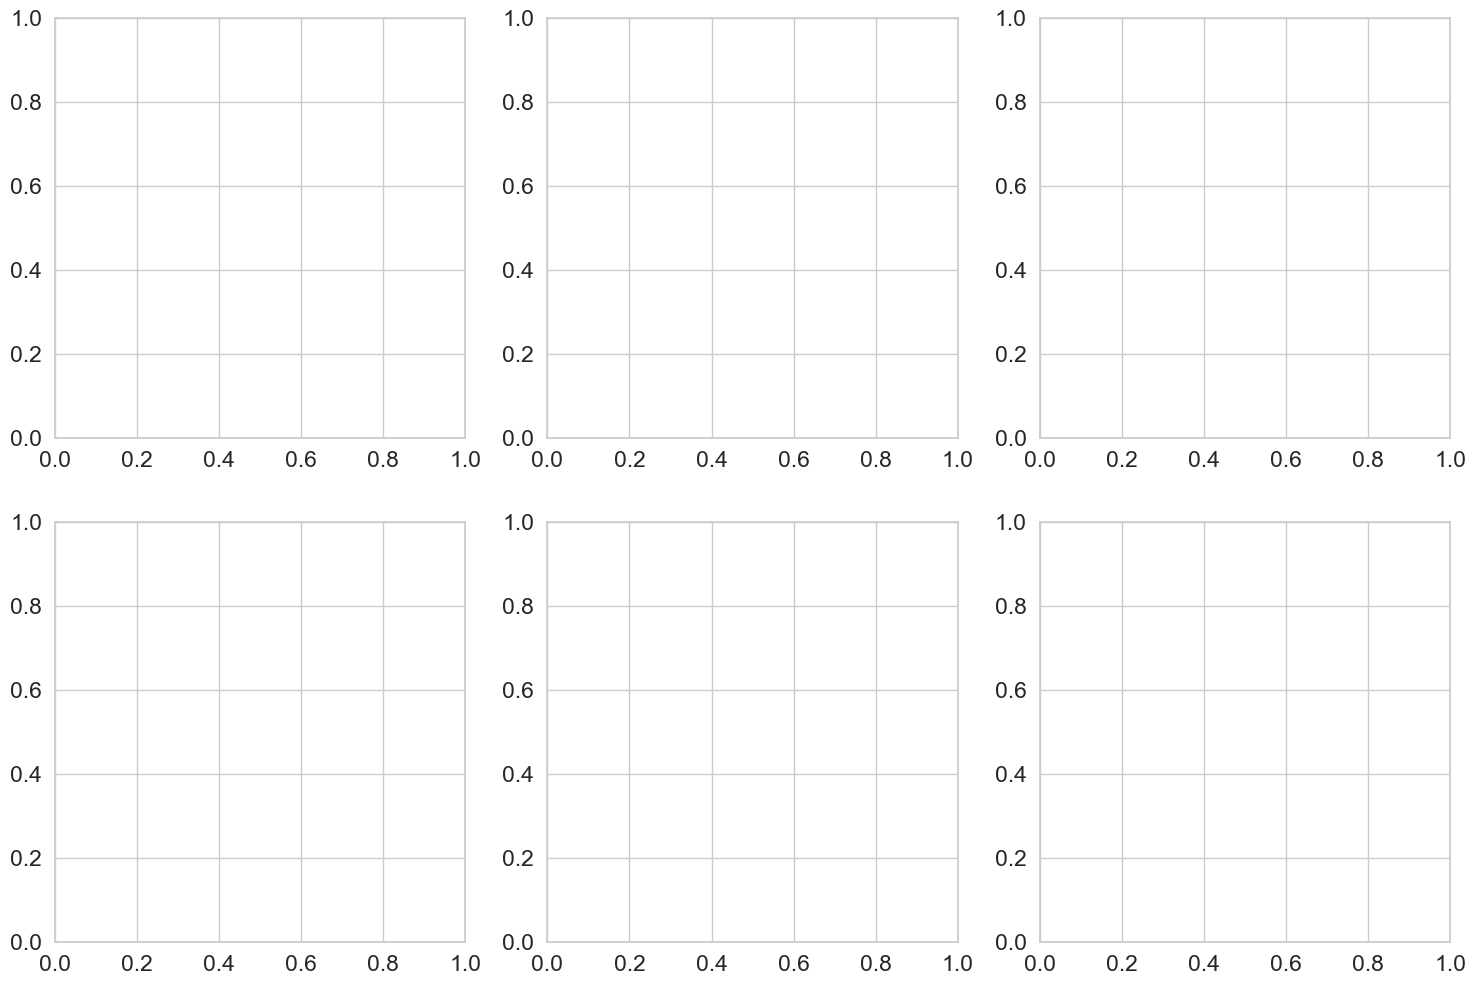

In [ ]:
from scipy.spatial import ConvexHull
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np
fixed_colors = {0: "green", # Single-label 
                1: "red", # (if another single exists, or unused in your case) 
                2: "orange", # Multi-label (most frequent combo) 
                3: "skyblue", # Other 
                4: "blue",
                5: "silver" # Other 
                }

# ---- Function 1: Single scatter plot with convex hull ----
def scatter(coords, categories, cat_names, fixed_colors, markersize=30, title="t-SNE embedding"):
    """
    Scatter plot for yeast t-SNE embedding with convex hulls.
    """
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')

    for c in np.unique(categories):
        mask = categories == c
        ax.scatter(coords[mask,0], coords[mask,1], 
                   lw=0, s=100 if c == 0 else markersize, 
                   color=fixed_colors.get(int(c), "gray"), 
                   label=str(c)+ " : " + cat_names.get(int(c), str(c)), 
                   alpha=0.7, edgecolor='k', linewidth=0.3)

        # Convex hull boundary
        if np.sum(mask) > 3:
            points = coords[mask]
            hull = ConvexHull(points)
            hull_points = np.append(hull.vertices, hull.vertices[0])  # loop back to start
            ax.plot(points[hull_points,0], points[hull_points,1], 
                    color=fixed_colors.get(int(c), "gray"), lw=2, alpha=0.8)

    # Cluster labels at median
    txts = []
    for c in np.unique(categories):
        xtext, ytext = np.median(coords[categories == c, :], axis=0)
        txt = ax.text(xtext, ytext, str(c), 
                      fontsize=22, weight='bold',
                      ha='center', va='center')
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=4, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel("t-SNE Dimension 1", fontsize=12)
    ax.set_ylabel("t-SNE Dimension 2", fontsize=12)
    ax.legend(loc="best", fontsize=10, frameon=True)
    ax.axis('tight')

    return f, ax, txts


# ---- Function 2: Subplot for multiple embeddings with convex hull ----
def plot_2d_subplots(results_dict, categories, cat_names, 
                     ncols=3, figsize=(20,18), markersize=30, fixed_colors=None):
    """
    Plot multiple 2D embeddings in a grid with convex hulls.
    """
    import math
    n = len(results_dict)
    nrows = math.ceil(n / ncols)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    for ax, (label, coords) in zip(axes.flat, results_dict.items()):
        for c in np.unique(categories):
            mask = categories == c
            color = fixed_colors.get(int(c), "gray") if fixed_colors else None
            ax.scatter(coords[mask,0], coords[mask,1],
                       s=100 if c == 0 else markersize,
                       color=color,
                       label=str(c) + " : "+cat_names.get(int(c), str(c)), 
                       alpha=0.7, edgecolor='k', linewidth=0.3)
            
        # Add cluster labels
        for c in np.unique(categories):
            xtext, ytext = np.median(coords[categories == c, :], axis=0)
            txt = ax.text(xtext, ytext, str(c), 
                        fontsize=22, weight='bold',
                        ha='center', va='center')
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=4, foreground="w"),
                PathEffects.Normal()])

        ax.set_title(str(label))
        ax.set_xlabel("Dim 1")
        ax.set_ylabel("Dim 2")
    
    # Hide unused subplots if any
    for ax in axes.flat[n:]:
        ax.set_visible(False)
    
    # Shared legend
    handles, labels = axes.flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right")
    
    plt.tight_layout()
    plt.show()


# Side-by-side plots with fixed colors
plot_2d_subplots(
    {f"Perp={p}": tsne_results[p] for p in perps}, 
    cat, cat_names, 
    ncols=3, figsize=(18,12), fixed_colors=fixed_colors
);

scatter(tsne_results[30], cat, cat_names, 
               title="t-SNE (perplexity=30)", fixed_colors=fixed_colors);


### 3. Veracity Inspection

The main goal of this visualization is to identify potential data quality issues. We will analyze the final t-SNE plot to visually identify regions that correspond to:

1.  **Noisy/Ambiguous Labels:** Points from one category that are deeply embedded within a cluster of another color.
2.  **Outliers:** Isolated points or very small, distant clusters that may represent experiments with unusual gene expression profiles.
3.  **Hard-to-Learn Samples:** Areas where the colors are heavily mixed, indicating that the feature vectors for different functional categories are very similar in these regions, making them difficult for a classifier to distinguish.

# Part C:  Isomap and Manifold Learning 

### 1. Isomap Implementation
### Fundamental Difference Between Isomap & t-SNE

Both **Isomap** and **t-SNE** are non-linear dimensionality reduction techniques, but they preserve
different aspects of the data structure:

---

#### Isomap: Preserves **Global Structure**
- **Idea:** Isomap builds a *neighborhood graph* of the data and estimates **geodesic distances**
  (shortest paths along the manifold, not straight-line Euclidean distances).
- Then, it applies classical **Multidimensional Scaling (MDS)** to preserve these geodesic distances
  in a lower-dimensional space.
- **Effect:** The embedding maintains **large-scale geometry** of the dataset — how clusters and
  regions relate globally.
- Example: If the data lies on a curved "Swiss roll" manifold, Isomap will **unroll** it smoothly,
  showing the overall global structure.

---

#### t-SNE: Preserves **Local Structure**
- **Idea:** t-SNE converts pairwise distances into probabilities that represent **local similarities**
  between points. It then finds a low-dimensional embedding where these similarities are preserved.
- The algorithm focuses on keeping **nearby points close together** while allowing global distances
  to be distorted.
- **Effect:** The embedding emphasizes **clusters** and local neighborhoods, but the distance between
  clusters is not necessarily meaningful.
- Example: t-SNE may separate distinct groups of points clearly, but their relative positions may be
  arbitrary (clusters could be closer/farther without reflecting true global geometry).

---

#### Summary
- **Isomap = Global preservation** → Good for understanding the *overall shape* of the data manifold
  and continuous structures.
- **t-SNE = Local preservation** → Good for discovering *clusters* and fine-grained local patterns,
  but less reliable for global relationships.
- In practice, both methods are complementary:  
  - Use **t-SNE** to find and visualize local clusters of similar samples.  
  - Use **Isomap** to understand the broader manifold and how clusters connect globally.


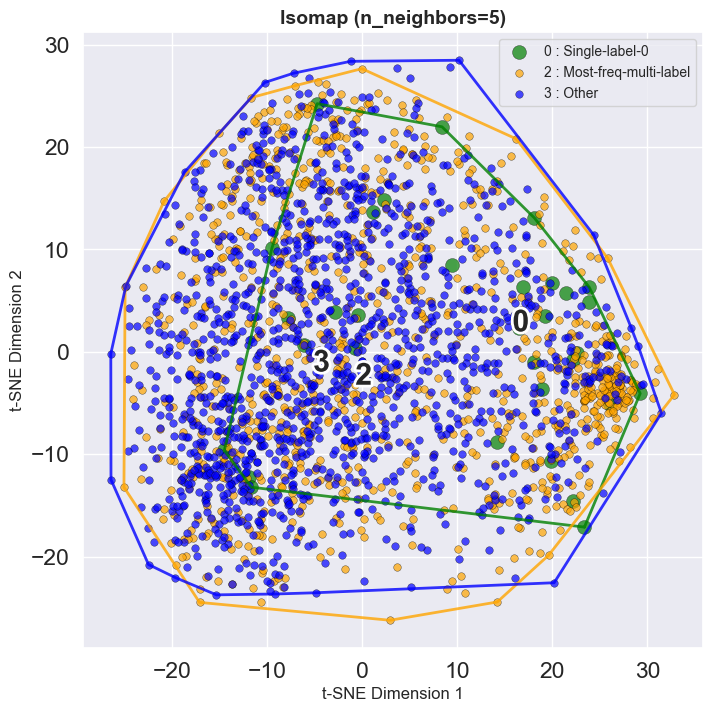

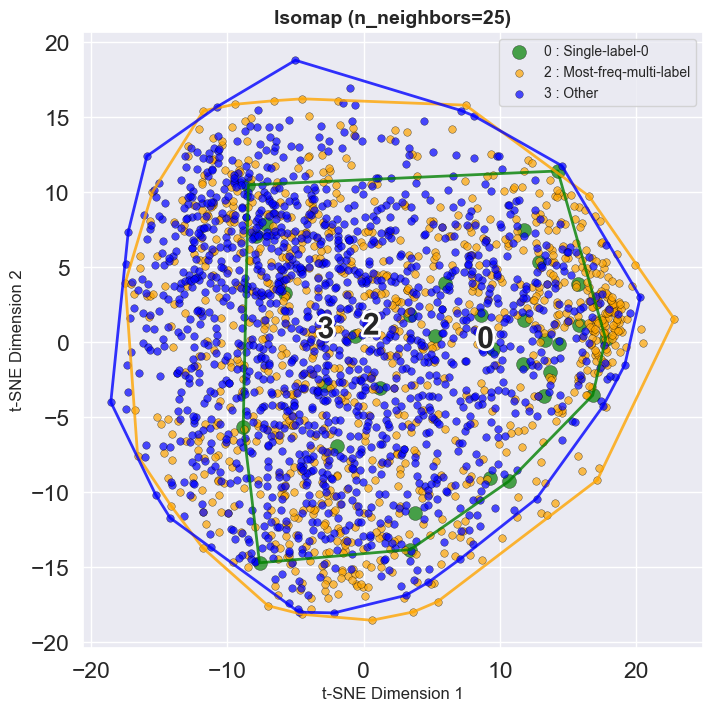

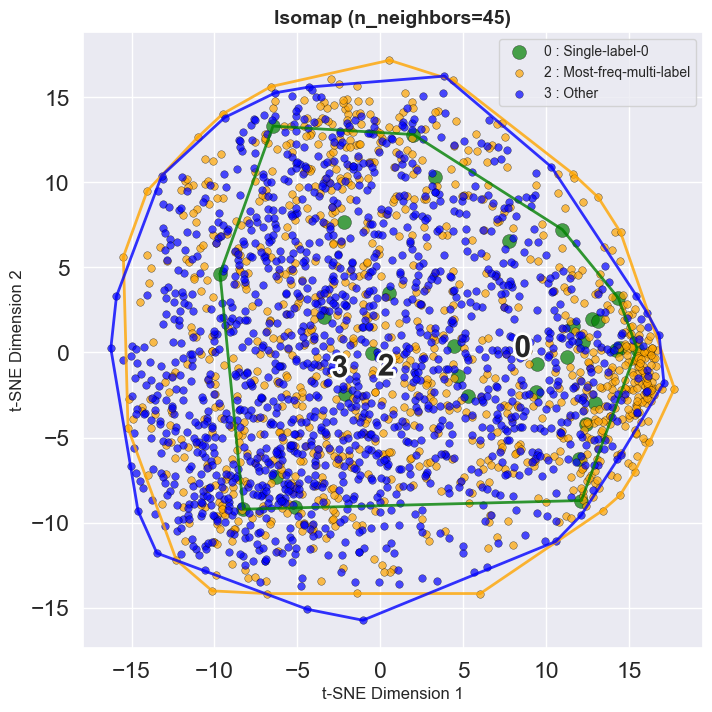

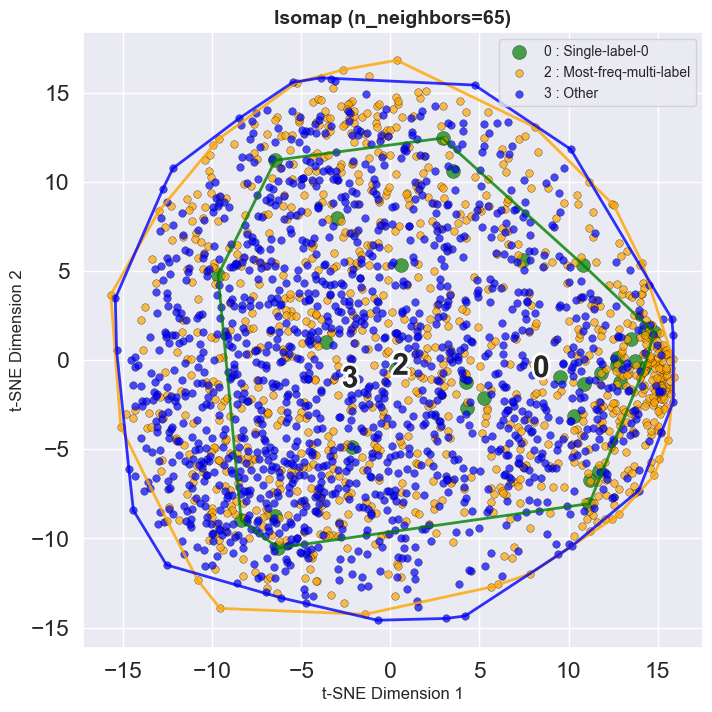

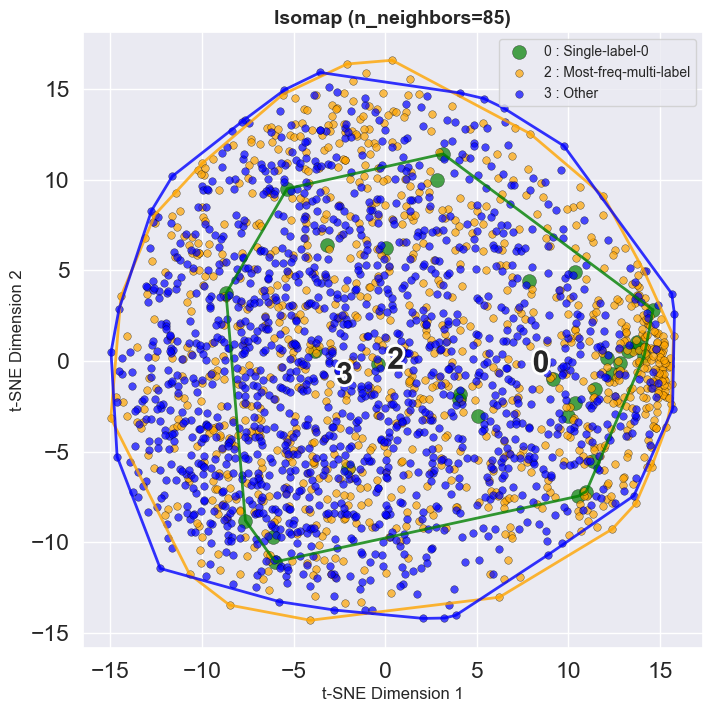

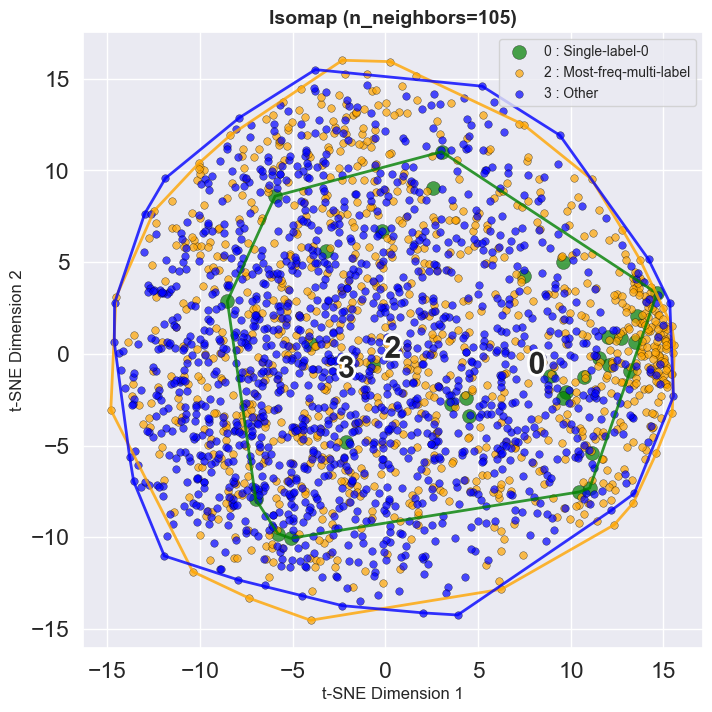

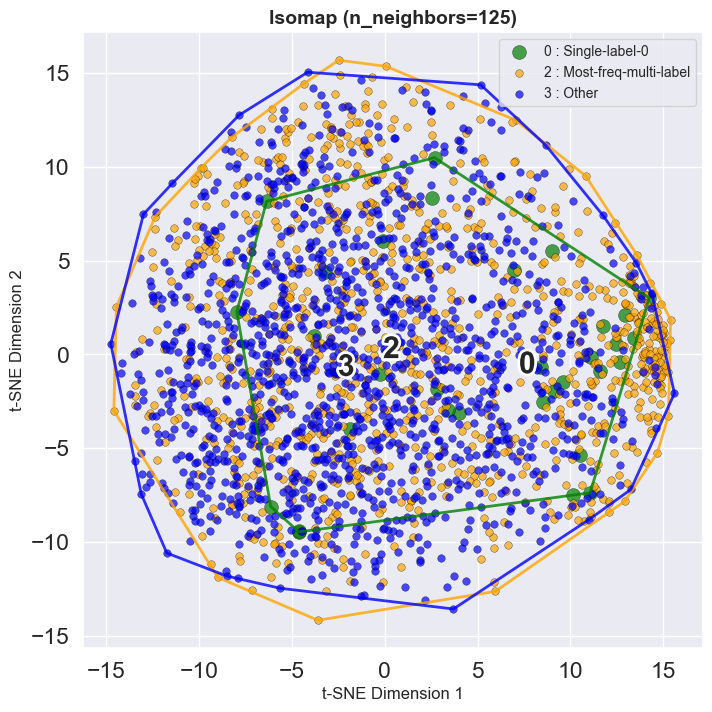

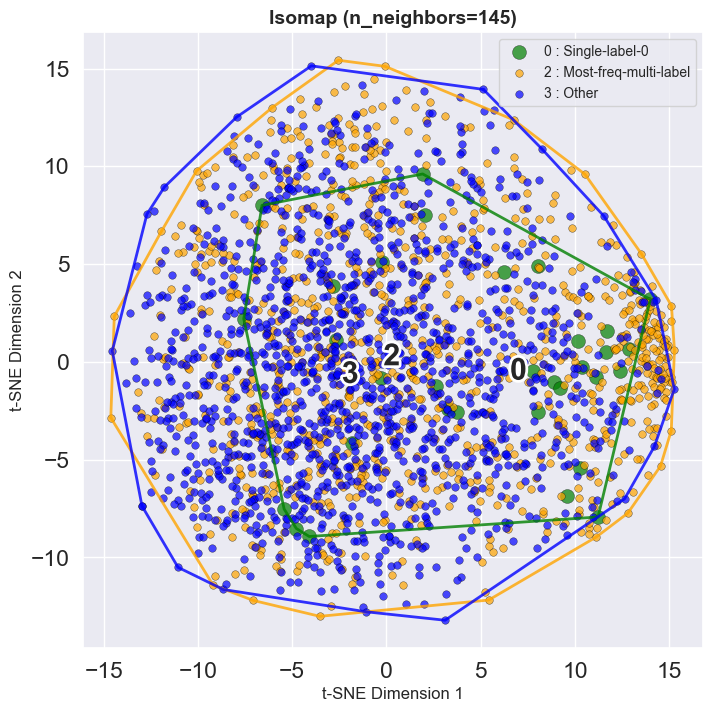

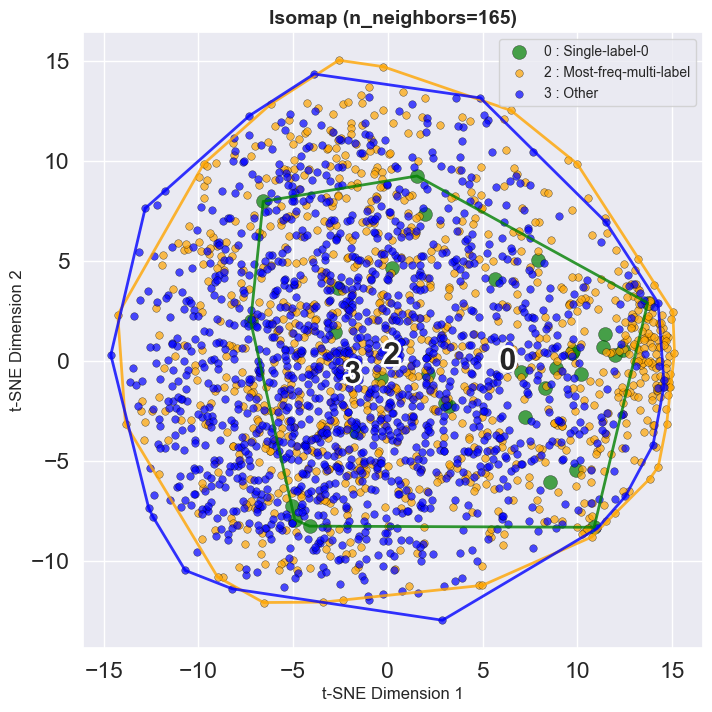

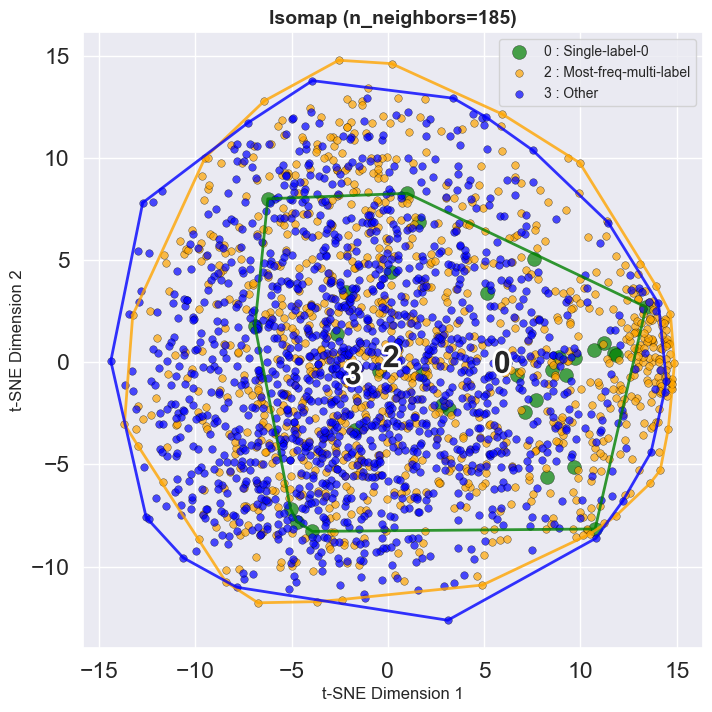

In [ ]:
for n in range(5, 200, 20):
    isomap = Isomap(n_components=2, n_neighbors=n)
    Z_iso = isomap.fit_transform(X_scaled)
    scatter(Z_iso, cat, cat_names, title=f'Isomap (n_neighbors={n})', fixed_colors=fixed_colors)
    plt.show()